In [1]:
import pandas as pd
import utils
import os
import skimage.util
import numpy as np
import matplotlib.pyplot as plt

In [2]:
channels = ["DNA", "AGP", "Mito", "ER", "RNA"]
channel_perturbation_df = pd.DataFrame()
overwrite = False

### ORF

In [3]:
orf_phenotypic_activity_df = pd.read_csv('../03.retrieve-annotations/output/phenotypic-activity-wellpos_cc_var_mad_outlier_featselect_sphering_harmony.csv.gz')
orf_phenotypic_activity_df.head()

,Metadata_JCP2022,mean_average_precision,p_value,corrected_p_value,below_p,below_corrected_p
0,JCP2022_900002,0.285216,0.452977,0.462195,False,False
1,JCP2022_900003,0.746396,0.012949,0.035433,True,True
2,JCP2022_900004,0.977500,0.002200,0.009404,True,True
3,JCP2022_900005,1.000000,0.000050,0.000496,True,True
4,JCP2022_900006,0.700833,0.024099,0.055054,True,True


In [4]:
p_value_min = orf_phenotypic_activity_df["corrected_p_value"].min()
orf_phenotypic_activity_df = orf_phenotypic_activity_df.query(
    f"corrected_p_value == {p_value_min}"
)
max_mean_average_precision = orf_phenotypic_activity_df["mean_average_precision"].max()
orf_phenotypic_activity_df = orf_phenotypic_activity_df.query(
    f"mean_average_precision == {max_mean_average_precision}"
)
orf_phenotypic_activity_df.head()

,Metadata_JCP2022,mean_average_precision,p_value,corrected_p_value,below_p,below_corrected_p
3,JCP2022_900005,1.0,0.00005,0.000496,True,True
12,JCP2022_900017,1.0,0.00005,0.000496,True,True
22,JCP2022_900027,1.0,0.00005,0.000496,True,True
35,JCP2022_900043,1.0,0.00005,0.000496,True,True
45,JCP2022_900053,1.0,0.00005,0.000496,True,True


In [5]:
for channel in channels:
    orf_phenotypic_activity_df = orf_phenotypic_activity_df.sample(
        n=1, random_state=12527
    ).reset_index(drop=True)
    perturbation = orf_phenotypic_activity_df["Metadata_JCP2022"].values[0]
    channel_perturbation_df = pd.concat(
        [
            channel_perturbation_df,
            pd.DataFrame(
                {
                    "channel": channel,
                    "Metadata_JCP2022": perturbation,
                    "modality": "ORF",
                    "pert_type": "trt",
                },
                index=[0],
            ),
        ]
    )

channel_perturbation_df

,channel,Metadata_JCP2022,modality,pert_type
0,DNA,JCP2022_900452,ORF,trt
0,AGP,JCP2022_900452,ORF,trt
0,Mito,JCP2022_900452,ORF,trt
0,ER,JCP2022_900452,ORF,trt
0,RNA,JCP2022_900452,ORF,trt


### CRISPR

In [6]:
crispr_phenotypic_activity_df = pd.read_csv('../03.retrieve-annotations/output/phenotypic-activity-wellpos_cc_var_mad_outlier_featselect_sphering_harmony_PCA_corrected.csv.gz')
crispr_phenotypic_activity_df.head()

,Metadata_JCP2022,mean_average_precision,p_value,corrected_p_value,below_p,below_corrected_p
0,JCP2022_800003,0.395030,0.104945,0.141160,False,False
1,JCP2022_800004,0.267461,0.362282,0.404050,False,False
2,JCP2022_800005,0.819167,0.000200,0.000641,True,True
3,JCP2022_800006,0.307781,0.340783,0.383941,False,False
4,JCP2022_800007,0.819028,0.000050,0.000181,True,True


In [7]:
p_value_min = crispr_phenotypic_activity_df["corrected_p_value"].min()
crispr_phenotypic_activity_df = crispr_phenotypic_activity_df.query(
    f"corrected_p_value == {p_value_min}"
)
max_mean_average_precision = crispr_phenotypic_activity_df["mean_average_precision"].max()
crispr_phenotypic_activity_df = crispr_phenotypic_activity_df.query(
    f"mean_average_precision == {max_mean_average_precision}"
)
crispr_phenotypic_activity_df.head()

,Metadata_JCP2022,mean_average_precision,p_value,corrected_p_value,below_p,below_corrected_p
14,JCP2022_800017,1.0,0.00005,0.000181,True,True
32,JCP2022_800035,1.0,0.00005,0.000181,True,True
51,JCP2022_800054,1.0,0.00005,0.000181,True,True
82,JCP2022_800085,1.0,0.00005,0.000181,True,True
104,JCP2022_800107,1.0,0.00005,0.000181,True,True


In [8]:
for channel in channels:
    crispr_phenotypic_activity_df = crispr_phenotypic_activity_df.sample(
        n=1, random_state=12527
    ).reset_index(drop=True)
    perturbation = crispr_phenotypic_activity_df["Metadata_JCP2022"].values[0]
    channel_perturbation_df = pd.concat(
        [
            channel_perturbation_df,
            pd.DataFrame(
                {
                    "channel": channel,
                    "Metadata_JCP2022": perturbation,
                    "modality": "CRISPR",
                    "pert_type": "trt",
                },
                index=[0],
            ),
        ]
    )

channel_perturbation_df

,channel,Metadata_JCP2022,modality,pert_type
0,DNA,JCP2022_900452,ORF,trt
0,AGP,JCP2022_900452,ORF,trt
0,Mito,JCP2022_900452,ORF,trt
0,ER,JCP2022_900452,ORF,trt
0,RNA,JCP2022_900452,ORF,trt
0,DNA,JCP2022_801538,CRISPR,trt
0,AGP,JCP2022_801538,CRISPR,trt
0,Mito,JCP2022_801538,CRISPR,trt
0,ER,JCP2022_801538,CRISPR,trt
0,RNA,JCP2022_801538,CRISPR,trt


Choose one negative control for ORF and CRISPR

In [9]:
orf_metadata_df = pd.read_csv('../datasets/metadata/orf.csv.gz').query("Metadata_pert_type=='negcon'")
orf_metadata_df.head()

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type
15137,JCP2022_915128,ccsbBroad304_99985,ORFC00001.1_TRC304.1,pLX_304,BFP.1,BFP,BFP,CONTROL,Hahn Lab BFP,99.5,717.0,negcon
15138,JCP2022_915129,ccsbBroad304_99988,ORFC00002.1_TRC304.1,pLX_304,HcRed.1,HcRed,HcRed,CONTROL,NaN,NaN,824.0,negcon
15139,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,1650.0,negcon
15140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon


In [10]:
crispr_metadata_df = pd.read_csv('../datasets/metadata/crispr.csv.gz')
crispr_metadata_df.head()

,Metadata_JCP2022,Metadata_NCBI_Gene_ID,Metadata_Symbol
0,JCP2022_800001,NaN,no-guide
1,JCP2022_800002,NaN,non-targeting
2,JCP2022_800003,2.0,A2M
3,JCP2022_800004,127550.0,A3GALT2
4,JCP2022_800005,53947.0,A4GALT


Choosing Luciferase for ORF and non-targeting guide for CRISPR

In [11]:
negcon_df = pd.DataFrame(
    {
        "channel": channels + channels,
        "modality": ["ORF" for _ in range(len(channels))]
        + ["CRISPR" for _ in range(len(channels))],
        "Metadata_JCP2022": ["JCP2022_915130" for _ in range(len(channels))]
        + ["JCP2022_800002" for _ in range(len(channels))],
        "pert_type": ["negcon" for _ in range(len(channels)*2)]
    },
    index=[_ for _ in range(len(channels) * 2)],
)

channel_perturbation_df = pd.concat(
    [channel_perturbation_df, negcon_df], ignore_index=True
)
channel_perturbation_df

,channel,Metadata_JCP2022,modality,pert_type
0,DNA,JCP2022_900452,ORF,trt
1,AGP,JCP2022_900452,ORF,trt
2,Mito,JCP2022_900452,ORF,trt
3,ER,JCP2022_900452,ORF,trt
4,RNA,JCP2022_900452,ORF,trt
5,DNA,JCP2022_801538,CRISPR,trt
6,AGP,JCP2022_801538,CRISPR,trt
7,Mito,JCP2022_801538,CRISPR,trt
8,ER,JCP2022_801538,CRISPR,trt
9,RNA,JCP2022_801538,CRISPR,trt


Select one well randomly for each perturbation

In [12]:
well_df = pd.read_csv("../datasets/metadata/well.csv.gz")

wells_chosen_df = pd.DataFrame()

for perturbation in channel_perturbation_df.Metadata_JCP2022.unique():
    df = well_df.query("Metadata_JCP2022 == @perturbation")
    df = df.sample(n=1, random_state=12527).reset_index(drop=True)
    wells_chosen_df = pd.concat([wells_chosen_df, df], ignore_index=True)

channel_perturbation_df = channel_perturbation_df.merge(
    wells_chosen_df, on="Metadata_JCP2022", how="left"
)

channel_perturbation_df

,channel,Metadata_JCP2022,modality,pert_type,Metadata_Source,Metadata_Plate,Metadata_Well
0,DNA,JCP2022_900452,ORF,trt,source_4,BR00125169,A11
1,AGP,JCP2022_900452,ORF,trt,source_4,BR00125169,A11
2,Mito,JCP2022_900452,ORF,trt,source_4,BR00125169,A11
3,ER,JCP2022_900452,ORF,trt,source_4,BR00125169,A11
4,RNA,JCP2022_900452,ORF,trt,source_4,BR00125169,A11
5,DNA,JCP2022_801538,CRISPR,trt,source_13,CP-CC9-R5-14,E16
6,AGP,JCP2022_801538,CRISPR,trt,source_13,CP-CC9-R5-14,E16
7,Mito,JCP2022_801538,CRISPR,trt,source_13,CP-CC9-R5-14,E16
8,ER,JCP2022_801538,CRISPR,trt,source_13,CP-CC9-R5-14,E16
9,RNA,JCP2022_801538,CRISPR,trt,source_13,CP-CC9-R5-14,E16


Add Gene symbol names to the metadata

In [13]:
orf_metadata_df = pd.read_csv("../00.download-and-process-annotations/output/orf_metadata.tsv.gz", sep='\t', usecols=["Metadata_JCP2022", "Metadata_Symbol"])
crispr_metadata_df = pd.read_csv("../00.download-and-process-annotations/output/crispr_metadata.tsv.gz", sep='\t', usecols=["Metadata_JCP2022", "Metadata_Symbol"])
metadata_df = pd.concat([orf_metadata_df, crispr_metadata_df], ignore_index=True)

channel_perturbation_df = channel_perturbation_df.merge(metadata_df, on="Metadata_JCP2022", how="left")

Add Batch information to the metadata

In [14]:
plate_df = pd.read_csv("../datasets/metadata/plate.csv.gz", usecols=["Metadata_Batch", "Metadata_Plate"])

channel_perturbation_df = channel_perturbation_df.merge(plate_df, on="Metadata_Plate", how="left")

channel_perturbation_df

,channel,Metadata_JCP2022,modality,pert_type,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_Symbol,Metadata_Batch
0,DNA,JCP2022_900452,ORF,trt,source_4,BR00125169,A11,EFNA4,2021_06_21_Batch7
1,AGP,JCP2022_900452,ORF,trt,source_4,BR00125169,A11,EFNA4,2021_06_21_Batch7
2,Mito,JCP2022_900452,ORF,trt,source_4,BR00125169,A11,EFNA4,2021_06_21_Batch7
3,ER,JCP2022_900452,ORF,trt,source_4,BR00125169,A11,EFNA4,2021_06_21_Batch7
4,RNA,JCP2022_900452,ORF,trt,source_4,BR00125169,A11,EFNA4,2021_06_21_Batch7
5,DNA,JCP2022_801538,CRISPR,trt,source_13,CP-CC9-R5-14,E16,CSNK1G3,20221109_Run5
6,AGP,JCP2022_801538,CRISPR,trt,source_13,CP-CC9-R5-14,E16,CSNK1G3,20221109_Run5
7,Mito,JCP2022_801538,CRISPR,trt,source_13,CP-CC9-R5-14,E16,CSNK1G3,20221109_Run5
8,ER,JCP2022_801538,CRISPR,trt,source_13,CP-CC9-R5-14,E16,CSNK1G3,20221109_Run5
9,RNA,JCP2022_801538,CRISPR,trt,source_13,CP-CC9-R5-14,E16,CSNK1G3,20221109_Run5


Download images from S3

In [15]:
if overwrite:
    os.system("rm -rf images")
    os.system("mkdir images")
    for jcpid in channel_perturbation_df.Metadata_JCP2022.unique():
        os.system(f"mkdir images/{jcpid}")
    utils.download_images(channel_perturbation_df)

Create Montage

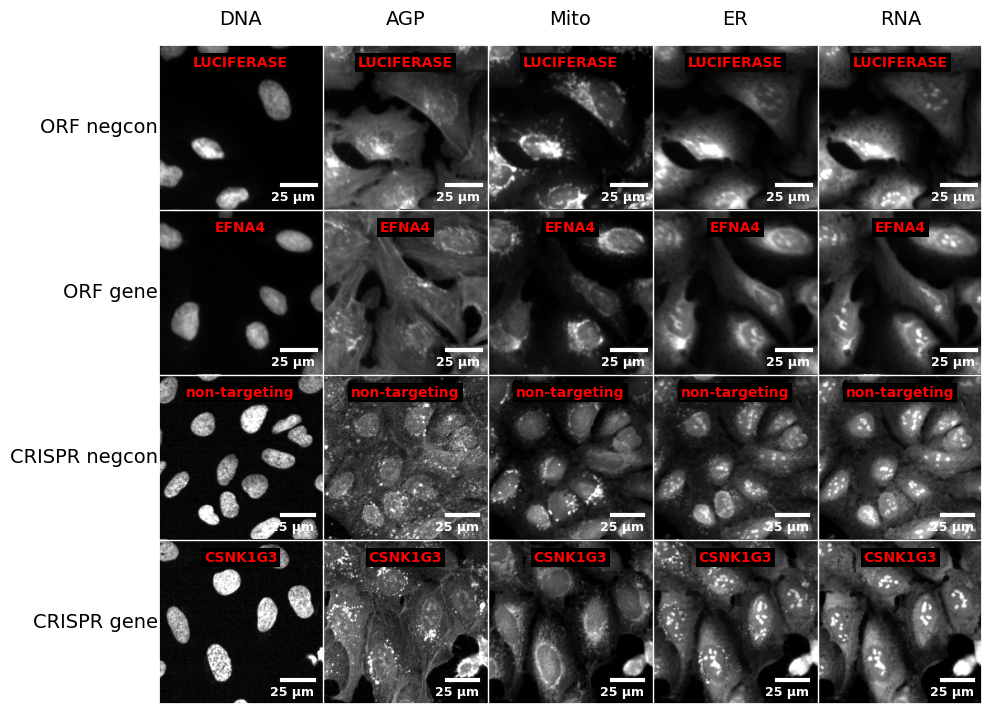

In [16]:
queries = [
    "pert_type == 'negcon' and modality=='ORF'",
    "pert_type == 'trt' and modality=='ORF'",
    "pert_type == 'negcon' and modality=='CRISPR'",
    "pert_type == 'trt' and modality=='CRISPR'",
]

images = []
image_labels = []
scale_bars = []
crop_size = 200

for query in queries:
    for row in channel_perturbation_df.query(query).itertuples():
        image_labels.append(row.Metadata_Symbol)
        filename = (
            f"images/{row.Metadata_JCP2022}/{row.Metadata_JCP2022}_{row.channel}.tiff"
        )
        img = skimage.io.imread(filename)
        img = utils.brighten_contrast_stretch(img)
        img = utils.get_top_right_crop(img, crop_size)
        img = utils.standardize_image(img, target_size=(crop_size, crop_size))
        if row.Metadata_Source == "source_4":
            source_4_image_size = 0.5979 * img.shape[1]
        elif row.Metadata_Source == "source_13":
            source_13_image_size = 0.65 * img.shape[1]
        images.append(img)
        if row.Metadata_Source == "source_4":
            scale_bars.append([source_4_image_size, 25])
        elif row.Metadata_Source == "source_13":
            scale_bars.append([source_13_image_size, 25])

row_labels = ["ORF negcon", "ORF gene", "CRISPR negcon", "CRISPR gene"]
col_labels = channels
grid_shape = (4, 5)

fig = utils.create_facet_grid_montage(
    images,
    row_labels,
    col_labels,
    grid_shape,
    image_labels,
    scale_bars = scale_bars,
    image_size=crop_size,
)

# Save the figure
fig.savefig("figures/facet_grid_montage.png", dpi=300, bbox_inches="tight")
fig.savefig("figures/facet_grid_montage.svg", dpi=300, bbox_inches="tight")

# Display the figure
plt.show()